In [1]:
import keras
keras.__version__

/home/leechan/anaconda3/envs/DLCNN/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

### 准备数据

In [7]:
import os, shutil

# defined directories of training set, validation set and test set
origin_train_dir = '/home/leechan/Documents/Capstone_Dog vs. Cats/Project_Dogs_vs_Cats/Dataset_Dogs_vs_Cats/train'
origin_test_dir = '/home/leechan/Documents/Capstone_Dog vs. Cats/Project_Dogs_vs_Cats/Dataset_Dogs_vs_Cats/test1'
base_dir = '/home/leechan/Documents/Capstone_Dog vs. Cats/Project_Dogs_vs_Cats/Dataset_Dogs_vs_Cats/base'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation_dir')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test_dir')
os.mkdir(test_dir)

# defined more specific directory with dog or cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# for feature extraction
test_image_dir = os.path.join(test_dir, 'test')
os.mkdir(test_image_dir)

# Copy images to the above defined directories
filenames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(train_cats_dir, filename)
    shutil.copyfile(src, dst)
    
filenames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(train_dogs_dir, filename)
    shutil.copyfile(src, dst)
    
filenames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(validation_cats_dir, filename)
    shutil.copyfile(src, dst)
    
filenames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(validation_dogs_dir, filename)
    shutil.copyfile(src, dst)

filenames = ['{}.jpg'.format(i) for i in range(1,12501)]
for filename in filenames:
    src = os.path.join(origin_test_dir, filename)
    dst = os.path.join(test_image_dir, filename)
    shutil.copyfile(src, dst)

在这里我们可以发现，在测试集和验证集中，两种类别的图片数量是相同的（事实上我们从Kaggle网站也可以确定测试集也存在这个特点）。因此这是一个平衡的二元分类问题（balanced binary classification），这意味着分类精度（accuracy）是一个合适的衡量分类结果好坏的标准。


### 搭建CNN模型
设计一个比随机猜测结果要好的基础模型。

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [31]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [32]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/30
400/400 [==============================] - 77s 192ms/step - loss: 0.6347 - acc: 0.6294 - val_loss: 0.5559 - val_acc: 0.7136
Epoch 2/30
400/400 [==============================] - 75s 187ms/step - loss: 0.5334 - acc: 0.7280 - val_loss: 0.4938 - val_acc: 0.7650
Epoch 3/30
400/400 [==============================] - 75s 187ms/step - loss: 0.4763 - acc: 0.7718 - val_loss: 0.4753 - val_acc: 0.7632
Epoch 4/30
400/400 [==============================] - 75s 188ms/step - loss: 0.4407 - acc: 0.7950 - val_loss: 0.4849 - val_acc: 0.7744
Epoch 5/30
400/400 [==============================] - 75s 187ms/step - loss: 0.4083 - acc: 0.8135 - val_loss: 0.4114 - val_acc: 0.8116
Epoch 6/30
400/400 [==============================] - 75s 187ms/step - loss: 0.3857 - acc: 0.8286 - val_loss: 0.3924 - val_acc: 0.8208
Epoch 7/30
400/400 [==============================] - 75s 188ms/step - loss: 0.3650 - acc: 0.8386 - val_loss: 0.4074 - val_acc: 0.8204
Epoch 8/30
400/400 [==============================] - 7

In [34]:
model.save('cats_vs_dogs_basic_1.h5')

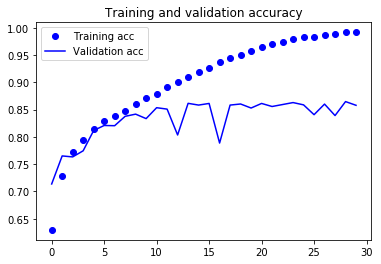

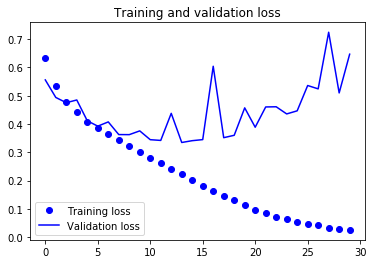

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

在验证集上的分类准确率大概为85%左右。

### 使用数据增强技术
如果使用这个数据增强的配置来训练一个新的网络，是不会有两次相同的输入的。但是，这些输入仍然是相互关联的，因为它们来自少量的原始图像，我们不能产生新的信息，而只能重新混合现有的信息。因此，这可能不足以完全摆脱过度拟合。为了进一步克服过度拟合，我们还将在我们的模型中全连接层分类器的前面添加一个dropout层：

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=70,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=70,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
400/400 [==============================] - 184s 460ms/step - loss: 0.6621 - acc: 0.5931 - val_loss: 0.5971 - val_acc: 0.6734
Epoch 2/100
400/400 [==============================] - 179s 448ms/step - loss: 0.6081 - acc: 0.6633 - val_loss: 0.5401 - val_acc: 0.7372
Epoch 3/100
400/400 [==============================] - 182s 454ms/step - loss: 0.5775 - acc: 0.6933 - val_loss: 0.5008 - val_acc: 0.7713
Epoch 4/100
400/400 [==============================] - 180s 449ms/step - loss: 0.5490 - acc: 0.7172 - val_loss: 0.5214 - val_acc: 0.7480
Epoch 5/100
400/400 [==============================] - 178s 445ms/step - loss: 0.5315 - acc: 0.7303 - val_loss: 0.4644 - val_acc: 0.7909
Epoch 6/100
400/400 [==============================] - 182s 455ms/step - loss: 0.5152 - acc: 0.7448 - val_loss: 0.4498 - val_acc: 0.7934
Epoch 7/100
400/400 [==============================] - 178s 445ms/step - loss: 0.5027 - acc: 

Epoch 60/100
400/400 [==============================] - 178s 445ms/step - loss: 0.2343 - acc: 0.9002 - val_loss: 0.2289 - val_acc: 0.9116
Epoch 61/100
400/400 [==============================] - 178s 445ms/step - loss: 0.2286 - acc: 0.9057 - val_loss: 0.1971 - val_acc: 0.9270
Epoch 62/100
400/400 [==============================] - 179s 448ms/step - loss: 0.2317 - acc: 0.9038 - val_loss: 0.2098 - val_acc: 0.9214
Epoch 63/100
400/400 [==============================] - 179s 446ms/step - loss: 0.2303 - acc: 0.9044 - val_loss: 0.1905 - val_acc: 0.9269
Epoch 64/100
400/400 [==============================] - 178s 446ms/step - loss: 0.2236 - acc: 0.9067 - val_loss: 0.2456 - val_acc: 0.9076
Epoch 65/100
400/400 [==============================] - 178s 444ms/step - loss: 0.2301 - acc: 0.9032 - val_loss: 0.1938 - val_acc: 0.9220
Epoch 66/100
400/400 [==============================] - 179s 447ms/step - loss: 0.2250 - acc: 0.9053 - val_loss: 0.2292 - val_acc: 0.9078
Epoch 67/100
400/400 [============

In [43]:
model.save('cats_vs_dogs_basic_2.h5')

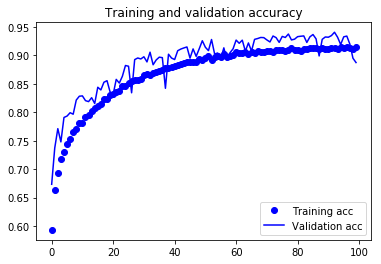

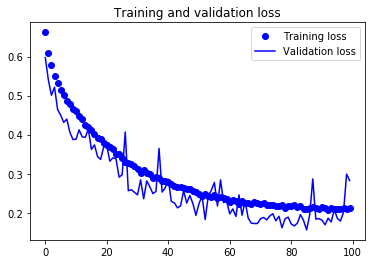

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()